In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import string
%matplotlib inline

In [42]:
import fht

In [9]:
def string_to_one_hot(sequence, use_alphabet=True):
    if use_alphabet:
        symbols_key = {a:b for a,b in zip((string.ascii_lowercase), range(26))}
    symbols = np.unique(list(sequence))
    symbols_key = {a:b for a,b in zip(symbols, range(len(symbols)))}
    new_sequence = [symbols_key[s] for s in list(sequence)]
    new_sequence = integers_to_one_hot(new_sequence)
    return new_sequence

def one_hot(length, index):
    vec = np.zeros(length)
    vec[index] = 1
    return vec

def integers_to_one_hot(sequence, num_states=None):
    if num_states is None:
        num_states = np.max(sequence)+1
    binary_sequence = [one_hot(num_states, a) for a in sequence]
    binary_sequence = np.array(binary_sequence).T
    return binary_sequence

def string_to_unicode(sequence, nbits=8):
    binary_sequence = np.zeros((nbits, len(sequence)))
    for i, letter in enumerate(sequence):
        vec = np.array([int(x) for x in format(ord(letter), 'b')])
        binary_sequence[:len(vec), i] = vec
    return binary_sequence

def one_hot_to_alphabet(binary_matrix, alphabet=None):
    a = {a:b for a,b in zip(range(26), string.ascii_lowercase)}
    alphabet = a if alphabet is None else {**a, **alphabet}
    text = ''.join([alphabet[np.argmax(binary_matrix[:, i])] for i in range(binary_matrix.shape[1])])
    return text

In [10]:
text = str(np.genfromtxt('alice.txt', dtype='str'))
bin_sequence = string_to_one_hot(text)

In [43]:
arr = np.zeros((8,8))
for i in range(40):
    arr[np.random.randint(8), np.random.randint(8)] = 1

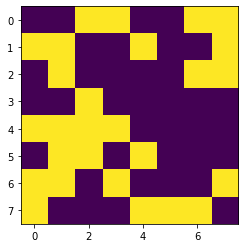

In [44]:
plt.imshow(arr)

In [45]:
hadamard = fht.fht(arr)

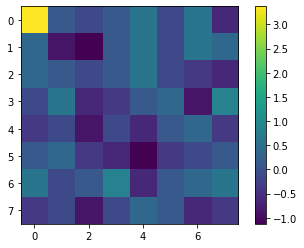

In [47]:
plt.imshow(hadamard)
plt.colorbar()

In [51]:
2**15

32768

In [53]:
2**5

32

In [54]:
new_bin = np.zeros((32, 32768))

In [55]:
new_bin[:26, :] = bin_sequence[:,:32768]

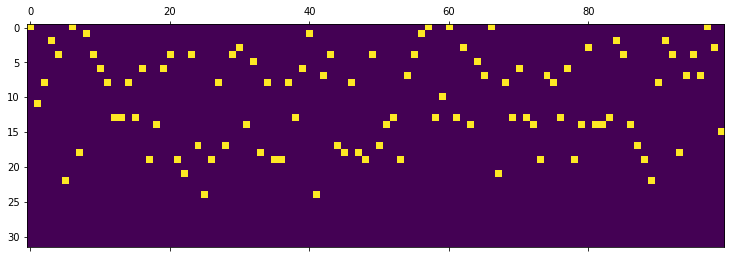

In [56]:
plt.matshow(new_bin[:,:100])

In [57]:
hadamard_alice = fht.fht(new_bin)

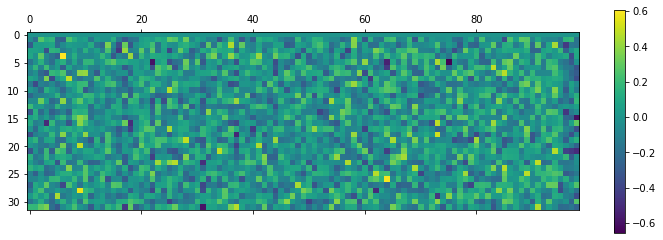

In [64]:
plt.matshow(hadamard_alice[:,1:100])
plt.colorbar()

In [36]:
ft = np.fft.fft2(bin_sequence, axes=[-2])

In [37]:
ft.shape

(26, 48055)

In [38]:
ft1 = np.fft.fft(bin_sequence[0])

In [39]:
ft1.shape

(48055,)

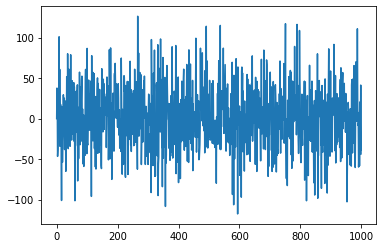

In [41]:
plt.plot(range(1000), ft1[:1000].imag)

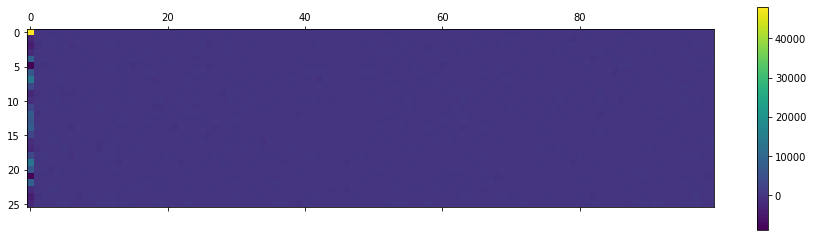

In [27]:
plt.matshow(ft[:,:100].real)
plt.colorbar()

In [30]:
bin_sequence.shape

(26, 48055)

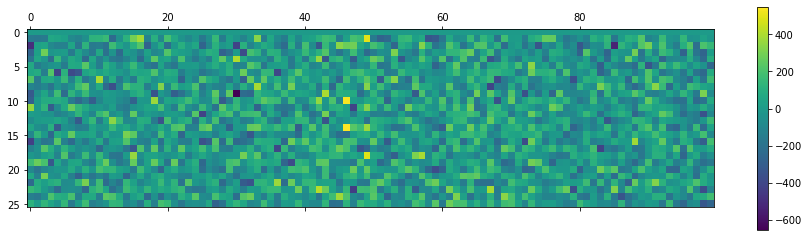

In [28]:
plt.matshow(ft[:,1000:1100].imag)
plt.colorbar()

In [31]:
ft.shape

(26, 48055)